In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_twice_merged=pd.read_csv('twice_merged.csv')
df_twice_merged.head()

,Unnamed: 0,Unnamed: 0.1,CAMIS,DATE,SCORE,INSPECTION TYPE,02A,02B,02C,02D,...,GRADE,prev_score,prev_critical,A,prev_A,DBA,CUISINE DESCRIPTION,is_chain,Community Board,BORO
0,0,1,30075445,2018-05-11,5.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,...,A,7.0,1,True,True,MORRIS PARK BAKE SHOP,Bakery,0,211.0,Bronx
1,1,2,30075445,2019-05-16,14.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,...,B,5.0,0,False,True,MORRIS PARK BAKE SHOP,Bakery,0,211.0,Bronx
2,2,4,30112340,2017-06-26,7.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,...,A,48.0,3,True,False,WENDY'S,Hamburgers,1,309.0,Brooklyn
3,3,5,30112340,2018-03-13,12.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,...,A,7.0,1,True,True,WENDY'S,Hamburgers,1,309.0,Brooklyn
4,4,6,30112340,2019-03-04,13.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,...,A,12.0,1,True,True,WENDY'S,Hamburgers,1,309.0,Brooklyn


In [3]:
df_manhattan=df_twice_merged.loc[df_twice_merged['BORO']=='Manhattan'][['A','prev_score','prev_critical','is_chain','CUISINE DESCRIPTION','Community Board']].dropna()
df_manhattan['Community Board']=df_manhattan['Community Board'].astype(int).astype(str)
df_manhattan.head()

,A,prev_score,prev_critical,is_chain,CUISINE DESCRIPTION,Community Board
5,True,13.0,2,0,Irish,104
6,True,12.0,1,0,Irish,104
15,True,11.0,1,0,American,108
29,False,12.0,1,0,American,107
30,False,22.0,3,0,American,107


In [4]:
df_cb_stats=pd.read_csv('cb_stats.csv')
df_cb_stats.drop(columns='Unnamed: 0',inplace=True)
df_cb_stats_man=df_cb_stats.loc[df_cb_stats['Community Board']<200]
df_cb_stats_man['Community Board']=df_cb_stats_man['Community Board'].astype(int).astype(str)
df_cb_stats_man

C:\Users\kosta\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Community Board,cb score mean,cb score std,cb count
0,101,14.684808,10.633265,2113
1,102,16.493172,11.560859,3149
2,103,17.736706,13.020565,3103
3,104,15.768121,10.975397,2704
4,105,14.678484,11.384473,6093
5,106,16.747238,11.282198,2172
6,107,15.930505,11.218918,1367
7,108,16.027832,10.412485,2048
8,109,16.032841,12.037315,609
9,110,16.457050,12.407261,617


In [5]:
df_cuis_stats_man=pd.read_csv('cuis_stats_man.csv')
df_cuis_stats_man.drop(columns='Unnamed: 0',inplace=True)
df_cuis_stats_man.head()

,CUISINE DESCRIPTION,cuisine score mean,cuisine score std,cuisine count
0,Afghan,14.083333,10.543920,12
1,African,20.181818,11.821635,66
2,American,15.510520,11.191669,7937
3,Armenian,15.324324,16.441908,37
4,Asian,17.968170,11.473329,377


In [6]:
df_manhattan_merged=df_manhattan.merge(df_cuis_stats_man,on='CUISINE DESCRIPTION').merge(df_cb_stats_man,on='Community Board')
df_manhattan_merged.head()

,A,prev_score,prev_critical,is_chain,CUISINE DESCRIPTION,Community Board,cuisine score mean,cuisine score std,cuisine count,cb score mean,cb score std,cb count
0,True,13.0,2,0,Irish,104,16.489418,9.536536,378,15.768121,10.975397,2704
1,True,12.0,1,0,Irish,104,16.489418,9.536536,378,15.768121,10.975397,2704
2,False,12.0,1,0,Irish,104,16.489418,9.536536,378,15.768121,10.975397,2704
3,False,17.0,2,0,Irish,104,16.489418,9.536536,378,15.768121,10.975397,2704
4,True,18.0,2,0,Irish,104,16.489418,9.536536,378,15.768121,10.975397,2704


In [7]:
df_manhattan_merged=df_manhattan_merged.drop(columns=['CUISINE DESCRIPTION','Community Board'])
df_manhattan_merged.head()

,A,prev_score,prev_critical,is_chain,cuisine score mean,cuisine score std,cuisine count,cb score mean,cb score std,cb count
0,True,13.0,2,0,16.489418,9.536536,378,15.768121,10.975397,2704
1,True,12.0,1,0,16.489418,9.536536,378,15.768121,10.975397,2704
2,False,12.0,1,0,16.489418,9.536536,378,15.768121,10.975397,2704
3,False,17.0,2,0,16.489418,9.536536,378,15.768121,10.975397,2704
4,True,18.0,2,0,16.489418,9.536536,378,15.768121,10.975397,2704


In [8]:
import itertools
def show_cf(y_true, y_pred, class_names=None, model_name=None):
    '''Stylized Visual Confusion Matrix provided by Flatiron School'''
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
#     class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()
    

determine features and target and create machine learning models

In [9]:
y=df_manhattan_merged['A']
X=df_manhattan_merged.drop(columns='A')

In [10]:
df_manhattan_merged['A'].value_counts()

True     10032
False     7065
Name: A, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y)

C:\Users\kosta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

       False       0.59      0.37      0.45      1772
        True       0.65      0.82      0.72      2503

    accuracy                           0.63      4275
   macro avg       0.62      0.59      0.59      4275
weighted avg       0.62      0.63      0.61      4275



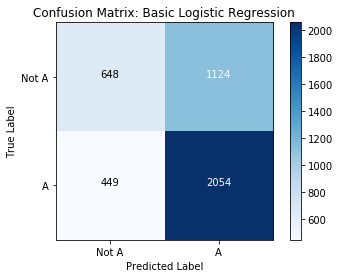

In [12]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))
show_cf(y_test,y_pred,class_names=['Not A','A'],model_name='Basic Logistic Regression')

In [13]:
#fit standard scaler to data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled_train, X_scaled_test, y_train, y_test=train_test_split(X_scaled,y)

              precision    recall  f1-score   support

       False       0.61      0.39      0.48      1765
        True       0.66      0.82      0.73      2510

    accuracy                           0.65      4275
   macro avg       0.64      0.61      0.61      4275
weighted avg       0.64      0.65      0.63      4275



C:\Users\kosta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


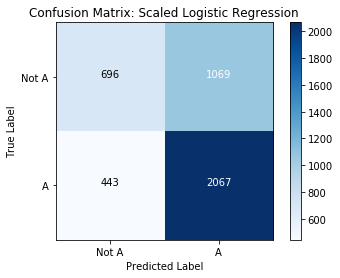

In [14]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_scaled_train,y_train)
y_pred=lr.predict(X_scaled_test)
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))
show_cf(y_test,y_pred,class_names=['Not A','A'],model_name='Scaled Logistic Regression')

In [15]:
#reesmaple data to addrss biased target outcomes
from imblearn.over_sampling import RandomOverSampler, SMOTE
X_resampled, y_resampled = SMOTE().fit_sample(X, y) 

Using TensorFlow backend.


In [16]:
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test=train_test_split(X_resampled,y_resampled)

C:\Users\kosta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

       False       0.63      0.61      0.62      2481
        True       0.63      0.65      0.64      2535

    accuracy                           0.63      5016
   macro avg       0.63      0.63      0.63      5016
weighted avg       0.63      0.63      0.63      5016



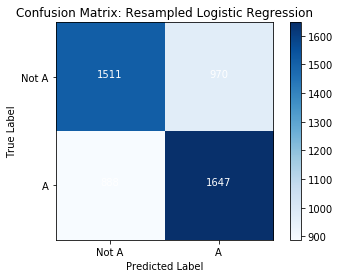

In [17]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_resampled_train,y_resampled_train)
y_pred=lr.predict(X_resampled_test)
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_resampled_test,y_pred))
show_cf(y_resampled_test,y_pred,class_names=['Not A','A'],model_name='Resampled Logistic Regression')

Both scaling and resmapling made improvements to the leanring model

In [18]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled_resampled, y_resampled = SMOTE().fit_sample(X_scaled, y) 
X_scaled_resampled_train, X_scaled_resampled_test, y_resampled_train, y_resampled_test=train_test_split(X_scaled_resampled,y_resampled)

              precision    recall  f1-score   support

       False       0.63      0.60      0.62      2531
        True       0.61      0.64      0.63      2485

    accuracy                           0.62      5016
   macro avg       0.62      0.62      0.62      5016
weighted avg       0.62      0.62      0.62      5016



C:\Users\kosta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


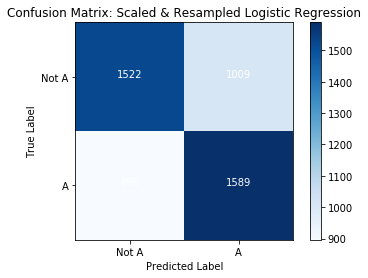

In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_scaled_resampled_train,y_resampled_train)
y_pred=lr.predict(X_scaled_resampled_test)
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_resampled_test,y_pred))
show_cf(y_resampled_test,y_pred,class_names=['Not A','A'],model_name='Scaled & Resampled Logistic Regression')

Scaling and Resampling together provide noticable improvements over the base model

Grid Search using XGBoost and 3 fold cross validation to tune for an improved model of the Logistic Rgression


In [20]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
param_grid_xgb= {
    "learning_rate": [0.3,0.5,0.7],
    'max_depth': [5,6,7],
    'min_child_weight': [0,1,3],
    'n_estimators': [10,100],
}
grid_xgb_man=GridSearchCV(estimator=xgb.XGBClassifier(),
                      param_grid=param_grid_xgb,
                     cv=3,
                     verbose=2)
grid_xgb_man.fit(X_scaled_resampled_train,y_resampled_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=10, total=   3.4s
[CV] learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=10 
[CV]  learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=10, total=   0.1s
[CV] learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=10 
[CV]  learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=10, total=   0.1s
[CV] learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=100, total=   0.6s
[CV] learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=100 
[CV]  learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=100, total=   0.6s
[CV] learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=100 
[CV]  learning_rate=0.3, max_depth=5, min_child_weight=0, n_estimators=100, total=   0.6s
[CV] learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=10, total=   0.1s
[CV] learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=10, total=   0.1s
[CV] learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=10 
[CV]  learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=10, total=   0.1s
[CV] learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=100 
[CV]  learning_r

[CV]  learning_rate=0.3, max_depth=7, min_child_weight=3, n_estimators=100, total=   0.8s
[CV] learning_rate=0.5, max_depth=5, min_child_weight=0, n_estimators=10 
[CV]  learning_rate=0.5, max_depth=5, min_child_weight=0, n_estimators=10, total=   0.1s
[CV] learning_rate=0.5, max_depth=5, min_child_weight=0, n_estimators=10 
[CV]  learning_rate=0.5, max_depth=5, min_child_weight=0, n_estimators=10, total=   0.1s
[CV] learning_rate=0.5, max_depth=5, min_child_weight=0, n_estimators=10 
[CV]  learning_rate=0.5, max_depth=5, min_child_weight=0, n_estimators=10, total=   0.1s
[CV] learning_rate=0.5, max_depth=5, min_child_weight=0, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=5, min_child_weight=0, n_estimators=100, total=   0.6s
[CV] learning_rate=0.5, max_depth=5, min_child_weight=0, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=5, min_child_weight=0, n_estimators=100, total=   0.6s
[CV] learning_rate=0.5, max_depth=5, min_child_weight=0, n_estimators=100 
[CV]  learning_r

[CV]  learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=10, total=   0.1s
[CV] learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=100, total=   0.8s
[CV] learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=100, total=   0.8s
[CV] learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=100, total=   0.8s
[CV] learning_rate=0.7, max_depth=5, min_child_weight=0, n_estimators=10 
[CV]  learning_rate=0.7, max_depth=5, min_child_weight=0, n_estimators=10, total=   0.1s
[CV] learning_rate=0.7, max_depth=5, min_child_weight=0, n_estimators=10 
[CV]  learning_rate=0.7, max_depth=5, min_child_weight=0, n_estimators=10, total=   0.1s
[CV] learning_rate=0.7, max_depth=5, min_child_weight=0, n_estimators=10 
[CV]  learning_r

[CV]  learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=100, total=   0.8s
[CV] learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=100 
[CV]  learning_rate=0.7, max_depth=7, min_child_weight=1, n_estimators=100, total=   0.8s
[CV] learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=10 
[CV]  learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=10, total=   0.1s
[CV] learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=10 
[CV]  learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=10, total=   0.1s
[CV] learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=10 
[CV]  learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=10, total=   0.1s
[CV] learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=100 
[CV]  learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=100, total=   0.8s
[CV] learning_rate=0.7, max_depth=7, min_child_weight=3, n_estimators=100 
[CV]  learning_r

[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:  1.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.3, 0.5, 0.7],
                         'max_depth': [5, 6, 7], 'min_child_weight': [0, 1, 3],
                         'n_

In [21]:
grid_xgb_man.best_params_

{'learning_rate': 0.3,
 'max_depth': 6,
 'min_child_weight': 0,
 'n_estimators': 100}

In [22]:
grid_xgb_man.best_score_

0.6632775119617225

              precision    recall  f1-score   support

       False       0.69      0.63      0.66      2531
        True       0.65      0.70      0.68      2485

    accuracy                           0.67      5016
   macro avg       0.67      0.67      0.67      5016
weighted avg       0.67      0.67      0.67      5016



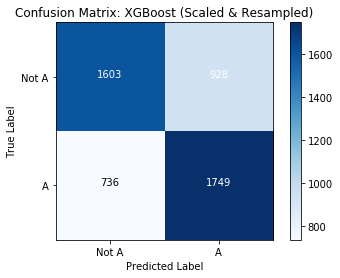

In [23]:
y_pred = grid_xgb_man.best_estimator_.predict(X_scaled_resampled_test)

print(classification_report(y_resampled_test,y_pred))
show_cf(y_resampled_test,y_pred,class_names=['Not A','A'],model_name='XGBoost (Scaled & Resampled)')

In [24]:
grid_xgb_man.best_estimator_.feature_importances_

array([0.23285726, 0.09051209, 0.09287223, 0.14745599, 0.09296887,
       0.09503329, 0.08706563, 0.08411563, 0.077119  ], dtype=float32)

save best Manhattan model

In [25]:
grid_xgb_man.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=0, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [26]:
import pickle
pickle.dump(grid_xgb_man.best_estimator_,  open('man2.pickle.dat', "wb"))

Build Keras Deep Leanring Neural Network to try for improvement on machine learning model

In [65]:
X_scaled_resampled_train.shape

(15048, 9)

In [83]:
from keras import Sequential,layers,models

model=models.Sequential()
model.add(layers.Dense(9,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history0=model.fit(X_scaled_resampled_train,y_resampled_train,epochs=120,batch_size=256,validation_split=0.1)

Train on 13543 samples, validate on 1505 samples
Epoch 1/120
13543/13543 [==============================] - 1s 44us/step - loss: 0.7499 - acc: 0.4656 - val_loss: 0.7193 - val_acc: 0.5156
Epoch 2/120
13543/13543 [==============================] - 0s 6us/step - loss: 0.6971 - acc: 0.5486 - val_loss: 0.6856 - val_acc: 0.5515
Epoch 3/120
13543/13543 [==============================] - 0s 7us/step - loss: 0.6747 - acc: 0.5884 - val_loss: 0.6703 - val_acc: 0.5854
Epoch 4/120
13543/13543 [==============================] - 0s 7us/step - loss: 0.6635 - acc: 0.6003 - val_loss: 0.6625 - val_acc: 0.6007
Epoch 5/120
13543/13543 [==============================] - 0s 7us/step - loss: 0.6573 - acc: 0.6073 - val_loss: 0.6580 - val_acc: 0.6093
Epoch 6/120
13543/13543 [==============================] - 0s 6us/step - loss: 0.6536 - acc: 0.6111 - val_loss: 0.6549 - val_acc: 0.6100
Epoch 7/120
13543/13543 [==============================] - 0s 8us/step - loss: 0.6509 - acc: 0.6163 - val_loss: 0.6528 - val_acc

13543/13543 [==============================] - 0s 5us/step - loss: 0.6361 - acc: 0.6355 - val_loss: 0.6371 - val_acc: 0.6379
Epoch 61/120
13543/13543 [==============================] - 0s 5us/step - loss: 0.6359 - acc: 0.6357 - val_loss: 0.6367 - val_acc: 0.6385
Epoch 62/120
13543/13543 [==============================] - 0s 5us/step - loss: 0.6358 - acc: 0.6353 - val_loss: 0.6368 - val_acc: 0.6385
Epoch 63/120
13543/13543 [==============================] - 0s 5us/step - loss: 0.6359 - acc: 0.6346 - val_loss: 0.6367 - val_acc: 0.6379
Epoch 64/120
13543/13543 [==============================] - 0s 5us/step - loss: 0.6358 - acc: 0.6351 - val_loss: 0.6369 - val_acc: 0.6379
Epoch 65/120
13543/13543 [==============================] - 0s 5us/step - loss: 0.6357 - acc: 0.6339 - val_loss: 0.6366 - val_acc: 0.6359
Epoch 66/120
13543/13543 [==============================] - 0s 5us/step - loss: 0.6357 - acc: 0.6347 - val_loss: 0.6366 - val_acc: 0.6399
Epoch 67/120
13543/13543 [=====================

In [82]:
def plt_hist(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

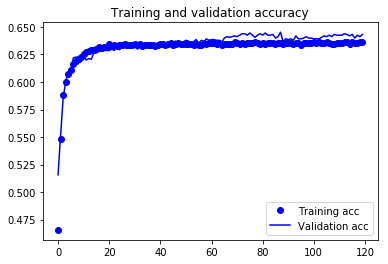

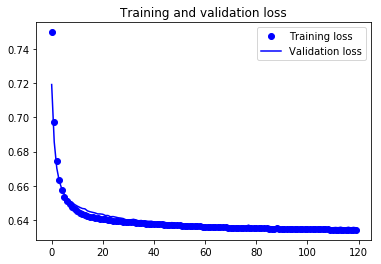

In [85]:
plt_hist(history0)

In [87]:
model=models.Sequential()
model.add(layers.Dense(9,activation='relu'))
model.add(layers.Dense(30,activation='relu'))
model.add(layers.Dense(30,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history1=model.fit(X_scaled_resampled_train,y_resampled_train,epochs=30,batch_size=256,validation_split=0.1)

Train on 13543 samples, validate on 1505 samples
Epoch 1/30
13543/13543 [==============================] - 1s 59us/step - loss: 0.6670 - acc: 0.6002 - val_loss: 0.6474 - val_acc: 0.6339
Epoch 2/30
13543/13543 [==============================] - 0s 7us/step - loss: 0.6506 - acc: 0.6270 - val_loss: 0.6422 - val_acc: 0.6332
Epoch 3/30
13543/13543 [==============================] - 0s 7us/step - loss: 0.6467 - acc: 0.6279 - val_loss: 0.6418 - val_acc: 0.6292
Epoch 4/30
13543/13543 [==============================] - 0s 7us/step - loss: 0.6441 - acc: 0.6296 - val_loss: 0.6394 - val_acc: 0.6266
Epoch 5/30
13543/13543 [==============================] - 0s 7us/step - loss: 0.6423 - acc: 0.6293 - val_loss: 0.6392 - val_acc: 0.6352
Epoch 6/30
13543/13543 [==============================] - 0s 8us/step - loss: 0.6411 - acc: 0.6294 - val_loss: 0.6382 - val_acc: 0.6365
Epoch 7/30
13543/13543 [==============================] - 0s 7us/step - loss: 0.6399 - acc: 0.6307 - val_loss: 0.6391 - val_acc: 0.635

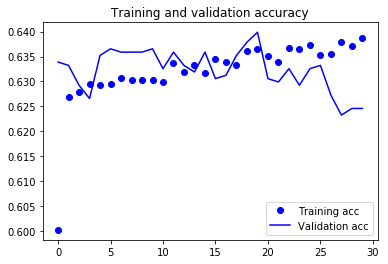

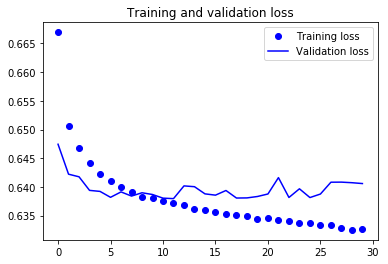

In [88]:
plt_hist(history1)

In [96]:
model=models.Sequential()
model.add(layers.Dense(100,input_shape=(9,),activation='relu'))
model.add(layers.Dense(30,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history1=model.fit(X_scaled_resampled_train,y_resampled_train,epochs=30,batch_size=256,validation_split=0.1)

Train on 13543 samples, validate on 1505 samples
Epoch 1/30
13543/13543 [==============================] - 1s 69us/step - loss: 0.6498 - acc: 0.6216 - val_loss: 0.6372 - val_acc: 0.6365
Epoch 2/30
13543/13543 [==============================] - 0s 8us/step - loss: 0.6388 - acc: 0.6327 - val_loss: 0.6354 - val_acc: 0.6432
Epoch 3/30
13543/13543 [==============================] - 0s 8us/step - loss: 0.6365 - acc: 0.6326 - val_loss: 0.6372 - val_acc: 0.6425
Epoch 4/30
13543/13543 [==============================] - 0s 9us/step - loss: 0.6353 - acc: 0.6349 - val_loss: 0.6380 - val_acc: 0.6346
Epoch 5/30
13543/13543 [==============================] - 0s 8us/step - loss: 0.6345 - acc: 0.6364 - val_loss: 0.6375 - val_acc: 0.6392
Epoch 6/30
13543/13543 [==============================] - 0s 8us/step - loss: 0.6336 - acc: 0.6356 - val_loss: 0.6372 - val_acc: 0.6425
Epoch 7/30
13543/13543 [==============================] - 0s 8us/step - loss: 0.6325 - acc: 0.6396 - val_loss: 0.6376 - val_acc: 0.635

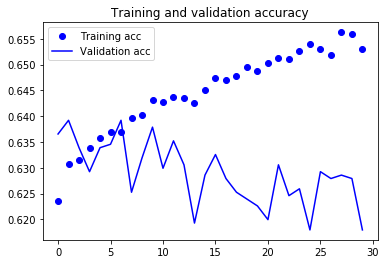

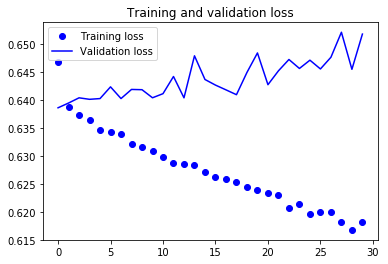

In [97]:
plt_hist(history2)